<a href="https://colab.research.google.com/github/Shrisha1/Learning-Tensorflow/blob/master/SobelColabCompatible.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
import skimage.io
import numpy as np
import matplotlib.pyplot as plt




In [0]:
def load_img(path_to_img):
  max_dim = 512
  img = tf.io.read_file(path_to_img)
  img = tf.image.decode_image(img, channels=3)
 
  return img

In [37]:
sess = tf.Session()
#Read Image
content_path = tf.keras.utils.get_file('chair.jpg', 'https://image.shutterstock.com/image-photo/brown-chair-isolated-on-white-260nw-1483454030.jpg')
image = load_img(content_path)
#Convert image to np array , cast it to float32 and expand dimension batchsize to 1 for 
#single image so as to become ompatible input for tf.image.sobel_edges  
image=sess.run(image)
image=np.array(image)
image = tf.cast(image, tf.float32)
image=tf.compat.v1.expand_dims(image, 0)



8192/6819 [====================================] - 0s 0us/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


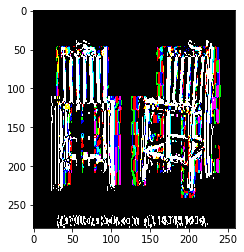

In [38]:
# call tf.image.sobel_edges and run the tensor
sobel= tf.image.sobel_edges(image)
SobelImage=sess.run(sobel)
# Convert the last  dimension to individual x and y coordinates 
sobel_x = np.asarray(SobelImage[0, :, :, :, 0])
sobel_y = np.asarray(SobelImage[0, :, :, :, 1])

# plot images

plt.imshow(sobel_x)
plt.imshow(sobel_y)
sess.close()